In [1]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import xarray as xr
from os.path import join
import numpy as np

In [2]:
ds = xr.open_dataset(join(r'/mnt/temp/sync_to_data/global_DEM/esa_lcm', 'ESACCI-LC-L4-LCCS-Map-300m-P1Y-1992-v2.0.7b.nc'))
ds

<xarray.Dataset>
Dimensions:              (lat: 64800, lon: 129600)
Coordinates:
  * lat                  (lat) float32 89.99861 89.995834 ... -89.99861
  * lon                  (lon) float32 -179.99861 -179.99583 ... 179.99861
Data variables:
    lccs_class           (lat, lon) float32 ...
    processed_flag       (lat, lon) float32 ...
    current_pixel_state  (lat, lon) float32 ...
    observation_count    (lat, lon) float32 ...
    change_count         (lat, lon) float32 ...
    crs                  int32 ...
Attributes:
    title:                      ESA CCI Land Cover Map
    summary:                    This dataset contains the global ESA CCI land...
    type:                       ESACCI-LC-L4-LCCS-Map-300m-P1Y
    id:                         ESACCI-LC-L4-LCCS-Map-300m-P1Y-1992-v2.0.7
    project:                    Climate Change Initiative - European Space Ag...
    references:                 http://www.esa-landcover-cci.org/
    institution:                Universite catholique de Louvain
    contact:                    landcover-cci@uclouvain.be
    comment:                    
    Conventions:                CF-1.6
    standard_name_vocabulary:   NetCDF Climate and Forecast (CF) Standard Nam...
    keywords:                   land cover classification,satellite,observation
    keywords_vocabulary:        NASA Global Change Master Directory (GCMD) Sc...
    license:                    ESA CCI Data Policy: free and open access
    naming_authority:           org.esa-cci
    cdm_data_type:              grid
    TileSize:                   2048:2048
    tracking_id:                f77f1b86-3c7a-4fe0-afc1-99d64aa625ed
    product_version:            2.0.7
    date_created:               20170615T201212Z
    creator_name:               University catholique de Louvain
    creator_url:                http://www.uclouvain.be/
    creator_email:              landcover-cci@uclouvain.be
    source:                     MERIS FR L1B version 5.05, MERIS RR L1B versi...
    history:                    amorgos-4,0, lc-sdr-1.0, lc-sr-1.0, lc-classi...
    time_coverage_start:        19920101
    time_coverage_end:          19921231
    time_coverage_duration:     P1Y
    time_coverage_resolution:   P1Y
    geospatial_lat_min:         -90.0
    geospatial_lat_max:         90.0
    geospatial_lon_min:         -180.0
    geospatial_lon_max:         180.0
    spatial_resolution:         300m
    geospatial_lat_units:       degrees_north
    geospatial_lat_resolution:  0.002778
    geospatial_lon_units:       degrees_east
    geospatial_lon_resolution:  0.002778

In [4]:
ds['lccs_class']

<xarray.DataArray 'lccs_class' (lat: 64800, lon: 129600)>
[8398080000 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 89.99861 89.995834 89.99306 ... -89.995834 -89.99861
  * lon      (lon) float32 -179.99861 -179.99583 ... 179.99583 179.99861
Attributes:
    long_name:            Land cover class defined in LCCS
    standard_name:        land_cover_lccs
    flag_values:          [   0   10   11   12   20   30   40   50   60   61 ...
    flag_meanings:        no_data cropland_rainfed cropland_rainfed_herbaceou...
    valid_min:            1
    valid_max:            220
    ancillary_variables:  processed_flag current_pixel_state observation_coun...

In [ ]:
len([   0   10   11   12   20   30   40   50   60   61   62   70   71   72
   80   81   82   90  100  110  120  121  122 -126 -116 -106 -105 -104
 -103  -96  -86  -76  -66  -56  -55  -54  -46  -36])

In [17]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [41]:
print(ds['lon'].shape, ds['lat'].shape)
print(ds['current_pixel_state'].shape)

coords = (-38.66047, 175.82709)

nz_left = (-40.16324025686148, 164.09661194577598)
nz_right = (-43.03788225744193, -178.43512706470034)
nz_up = (-33.26751576081219, 173.28118187485885)
nz_down = (-47.84367354881798, 172.99553738672037)

lat_idx0 = find_nearest(ds['lat'].values, nz_up[0])
lat_idx1 = find_nearest(ds['lat'].values, nz_down[0])
lon_idx0 = find_nearest(ds['lon'].values, nz_left[1])
lon_idx1 = find_nearest(ds['lon'].values, nz_right[1])

print(f'\n\nidxs: lat_idx0: {lat_idx0}, lat_idx1: {lat_idx1}, \nlon_idx0: {lon_idx0}, lon_idx1: lon_idx1: {lon_idx1}')

print(f'lat, lon idxs: {lat_idx}, {lon_idx}')

lats = ds['lat'][lat_idx0[1]:lat_idx1[1]]
lons = ds['lon'][lon_idx0[1]:]
data = ds['lccs_class'][lat_idx0[1]:lat_idx1[1], lon_idx0[1]:]
print(lons.shape, lats.shape)
print(data.shape)

(129600,) (64800,)
(64800, 129600)


idxs: lat_idx0: (-33.268055, 44376), lat_idx1: (-47.843056, 49623), 
lon_idx0: (164.09584, 123874), lon_idx1: lon_idx1: (-178.43472, 563)
lat, lon idxs: 46317, 128097
(5726,) (5247,)
(5247, 5726)


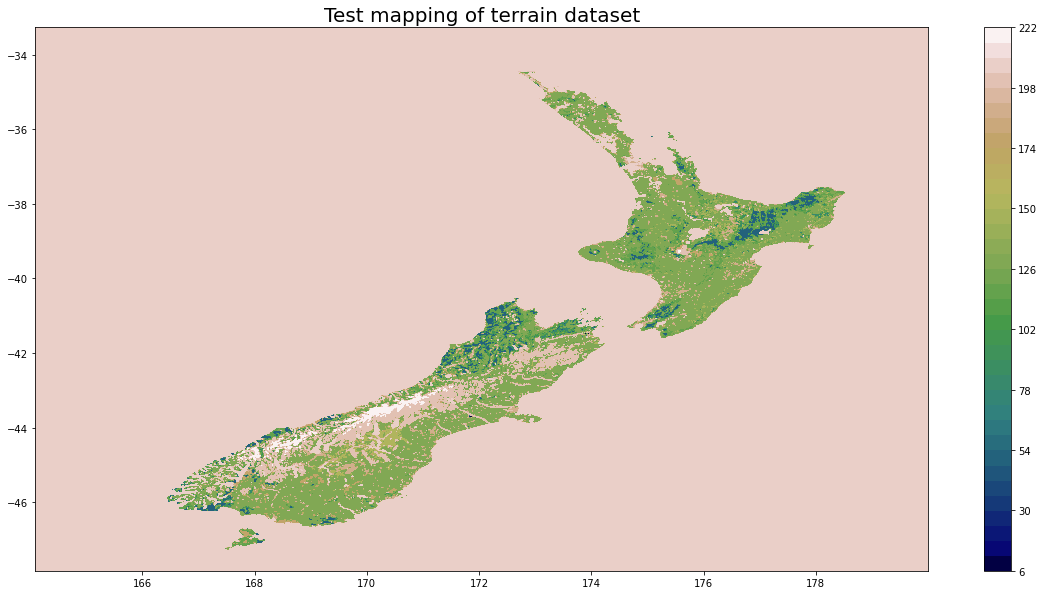

In [46]:
fig = plt.figure(figsize=(20, 10))
pmesh = plt.contourf(lons, lats, data, levels=40, cmap='gist_earth')
plt.colorbar(pmesh)
plt.title('Test mapping of terrain dataset', fontsize=20)
fig.patch.set_facecolor('white')
plt.savefig(r'/home/shaun/Desktop/nz_terrain_mapping.png', bbox_inches='tight', dpi=200)